In [19]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importowanie csv do ramki danych
covidInfo = pd.read_csv('COVID-19 Coronavirus.csv')
covidInfo.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [20]:
covidInfo['Continent'].replace({'Asia': 1, 'Europe': 2, 'Africa': 3, 'Latin America and the Caribbean': 4, 'Oceania': 5, 'Asia': 6, 'Northern America': 7}, inplace = True)

print(covidInfo.describe())
print(covidInfo.info())
print(covidInfo.isnull().values.any())

         Population   Continent   Total Cases  Total Deaths  \
count  2.250000e+02  225.000000  2.250000e+02  2.250000e+02   
mean   3.507321e+07    3.893333  2.184781e+06  2.744813e+04   
std    1.392418e+08    1.502141  7.275938e+06  9.689177e+04   
min    8.050000e+02    2.000000  1.000000e+00  0.000000e+00   
25%    5.665570e+05    3.000000  2.407100e+04  1.890000e+02   
50%    5.827911e+06    4.000000  1.639360e+05  1.965000e+03   
75%    2.190585e+07    5.000000  1.092547e+06  1.366000e+04   
max    1.439324e+09    7.000000  8.183905e+07  1.008222e+06   

       Tot Cases//1M pop  Tot Deaths/1M pop  Death percentage  
count         225.000000         225.000000        225.000000  
mean       136900.373333        1096.715556          1.444125  
std        145060.340289        1195.715543          1.741728  
min             9.000000           0.000000          0.000000  
25%         11384.000000         123.000000          0.511291  
50%         88987.000000         708.000000     

<AxesSubplot:>

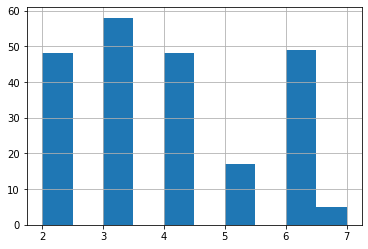

In [21]:
covidInfo['Continent'].hist()

<AxesSubplot:>

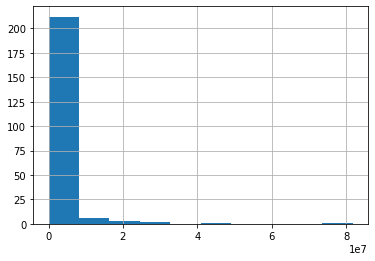

In [22]:
covidInfo['Total Cases'].hist()

In [23]:
covidInfo.drop(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Total Deaths'], axis=1, inplace = True)
covidInfo

,Population,Continent,Total Cases,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,40462186,6,177827,4395,190,4.313743
1,2872296,2,273870,95349,1216,1.275058
2,45236699,3,265691,5873,152,2.587216
3,77481,2,40024,516565,1975,0.382271
4,34654212,3,99194,2862,55,1.915438
...,...,...,...,...,...,...
220,10894,5,454,41674,643,1.541850
221,623031,3,10,16,2,10.000000
222,30975258,6,11806,381,69,18.151787
223,19284482,3,317076,16442,206,1.251120


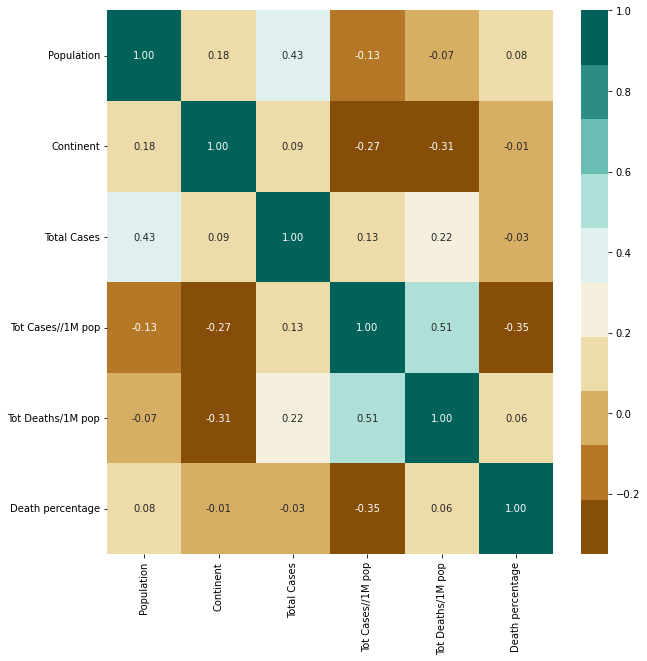

In [24]:
correlations = covidInfo.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(covidInfo.columns);

plt.show()


In [25]:
covidInfo.fillna(covidInfo.mean(), inplace=True)
death = covidInfo['Death percentage']

death[death <= 2] = 1
death[death.between(2, 4)] = 2
death[death.between(4, 6)] = 3
death[death.between(6, 8)] = 4
death[death.between(8, 10)] = 5
death[death.between(10, 12)] = 6
death[death.between(12, 14)] = 7
death[death.between(14, 16)] = 8
death[death.between(16, 18)] = 9
death[death > 18] = 10


covidInfo['Death percentage'] = death

covidInfo

/var/folders/64/zn_81cqn4xz4jnwp2p_ymy140000gn/T/ipykernel_63155/1539323424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death[death <= 2] = 1
/var/folders/64/zn_81cqn4xz4jnwp2p_ymy140000gn/T/ipykernel_63155/1539323424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death[death.between(2, 4)] = 2
/var/folders/64/zn_81cqn4xz4jnwp2p_ymy140000gn/T/ipykernel_63155/1539323424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de

,Population,Continent,Total Cases,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,40462186,6,177827,4395,190,3.0
1,2872296,2,273870,95349,1216,1.0
2,45236699,3,265691,5873,152,2.0
3,77481,2,40024,516565,1975,1.0
4,34654212,3,99194,2862,55,1.0
...,...,...,...,...,...,...
220,10894,5,454,41674,643,1.0
221,623031,3,10,16,2,5.0
222,30975258,6,11806,381,69,10.0
223,19284482,3,317076,16442,206,1.0


In [26]:
# zbiór danych
X = covidInfo.drop('Death percentage', axis=1).to_numpy()
X

array([[40462186,        6,   177827,     4395,      190],
       [ 2872296,        2,   273870,    95349,     1216],
       [45236699,        3,   265691,     5873,      152],
       ...,
       [30975258,        6,    11806,      381,       69],
       [19284482,        3,   317076,    16442,      206],
       [15241601,        3,   246525,    16174,      357]])

In [27]:
# zbiór etykiet
y = covidInfo.loc[:, 'Death percentage'].to_numpy()
y

array([ 3.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  1.,
        2.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  2.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,
        1.,  1.,  2.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,
        3.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,
        1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  3.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [29]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [30]:
# MODEL 1 - regresja logistyczna 
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.8529411764705882, 0.7631578947368421, 0.8055555555555555, 0.6666666666666666]


/Users/kacperadamczak/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kacperadamczak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.9705882352941176, 0.75, 0.846153846153846, 0.7333333333333333]


/Users/kacperadamczak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.8823529411764706, 0.8571428571428571, 0.8695652173913043, 0.7333333333333333]


/Users/kacperadamczak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

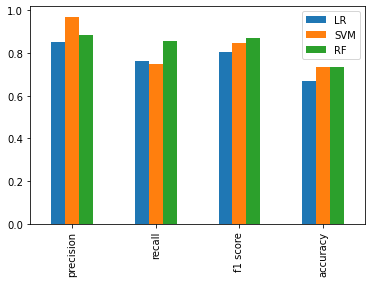

In [33]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [34]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.7352941176470589, 0.6944444444444444, 0.7142857142857144, 0.5555555555555556]


/Users/kacperadamczak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [1.0, 0.7555555555555555, 0.8607594936708861, 0.7555555555555555]
SVM kernel='sigmoid' [0.9411764705882353, 0.8, 0.8648648648648648, 0.7555555555555555]
SVM degree=4 [0.9705882352941176, 0.75, 0.846153846153846, 0.7333333333333333]


/Users/kacperadamczak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kacperadamczak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kacperadamczak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pickle 
with open('death_chance_from_covid_model.pickle', 'wb') as handle:
    pickle.dump(accuracy, handle)